In [8]:
import math
import pandas as pd
import networkx as nx
import osmnx as ox

import requests
import json 
from collections import Counter

In [12]:
west=-74.3068778-0.01
east=-73.9337932+0.01
north=4.78+0.01
south=4.4266025-0.01

bog = ox.graph_from_bbox(4.691818, 4.650226,-74.084178, -74.128937, network_type='bike',simplify=False)
#bog = ox.graph_from_bbox(north, south, east, west, infrastructure = 'way["bikepath"]',simplify=False)
#bog = ox.graph_from_bbox(north, south, east, west, infrastructure = 'way["highway"]',custom_filter='["highway"~"cycleway"]')

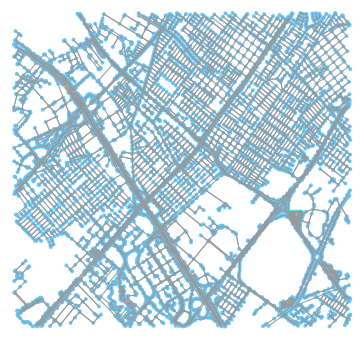

(<Figure size 465.005x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa2ff73e48>)

In [13]:
ox.plot_graph(bog)

In [14]:
useful_tags = ox.settings.useful_tags_path + ['cycleway']
ox.config(use_cache=True, log_console=True, useful_tags_path=useful_tags)
G = ox.graph_from_bbox(north, south, east, west, network_type='bike', simplify=False)
non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
G.remove_edges_from(non_cycleways)
G = ox.remove_isolated_nodes(G)
#G = ox.simplify_graph(G)

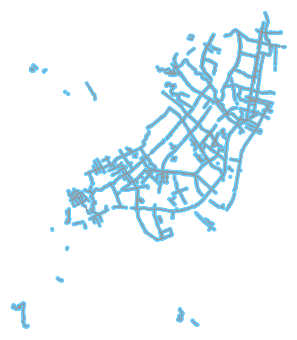

(<Figure size 376.545x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa3a3836d8>)

In [15]:
ox.plot_graph(G)

In [19]:
#df_g1[['u','v']].set_index('u').to_csv('pairs_latent_bike_20190401.csv')
df_g1=ox.graph_to_gdfs(G, nodes=False)
len(df_g1)

22755

In [20]:
df_g1[['u','v']].set_index('u').to_csv('osm_bikepaths.csv')